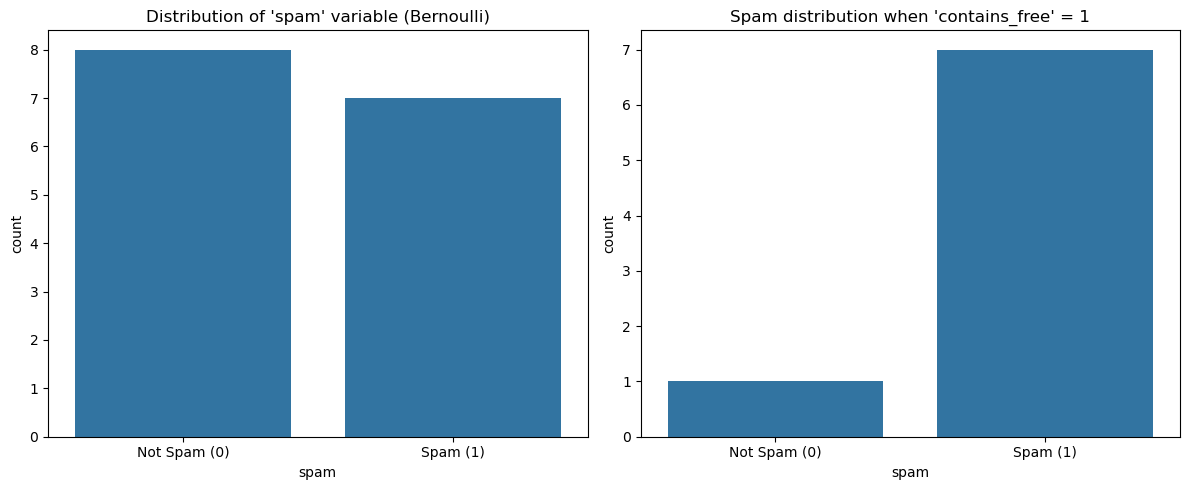

📊 Overall probability of spam: 0.47
📊 P(spam | contains 'free') = 0.88

Chi-squared test for independence:
Chi² statistic: 8.237802933673468
p-value: 0.004102676468284866
✅ Reject H0: Presence of 'free' significantly affects spam classification.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, chi2_contingency

# 1. Sample Data
# Simulated binary dataset: whether the message contains "free" and whether it is spam
data = pd.DataFrame({
    "contains_free": [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
    "spam":          [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
})

# 2. Visualization of the Bernoulli distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of 'spam' variable
sns.countplot(x='spam', data=data, ax=axs[0])
axs[0].set_title("Distribution of 'spam' variable (Bernoulli)")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Not Spam (0)", "Spam (1)"])

# Conditional histogram: spam when contains_free == 1
free_spam = data[data['contains_free'] == 1]
sns.countplot(x='spam', data=free_spam, ax=axs[1])
axs[1].set_title("Spam distribution when 'contains_free' = 1")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Not Spam (0)", "Spam (1)"])

plt.tight_layout()
plt.show()

# 3. Bernoulli Probability Calculations
p_spam = data['spam'].mean()  # overall probability of spam
p_spam_given_free = free_spam['spam'].mean()  # conditional probability: P(spam | contains "free")

print(f"📊 Overall probability of spam: {p_spam:.2f}")
print(f"📊 P(spam | contains 'free') = {p_spam_given_free:.2f}")

# 4. Hypothesis Testing: Does "free" significantly affect spam?
# H0 (null): 'contains_free' and 'spam' are independent
# H1 (alternative): they are dependent

contingency = pd.crosstab(data['contains_free'], data['spam'])
chi2, p_val, dof, expected = chi2_contingency(contingency)

print("\nChi-squared test for independence:")
print("Chi² statistic:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("✅ Reject H0: Presence of 'free' significantly affects spam classification.")
else:
    print("❌ Fail to reject H0: No significant evidence that 'free' affects spam.")